In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from collections import OrderedDict

## Train Data Import

In [3]:
data_dir = "../data/humpback-whale-challenge"
train_dir = "train"

csv_file = "train.csv"
df = pd.read_csv(filepath_or_buffer=os.path.join(data_dir,csv_file))

## # of Train / Test Set Images

In [4]:
# training set
n_train = df['Image'].size
print("\nTrain: %d images" %n_train)

train_dict = dict(zip(df['Id'].tolist(), df['Image'].tolist()))

# test set
test_dir = "test"
n_test = len(next(os.walk(os.path.join(data_dir,test_dir)))[2])
print("Test: %d images" %n_test)


Train: 9850 images
Test: 15610 images


## Visualize Train Images

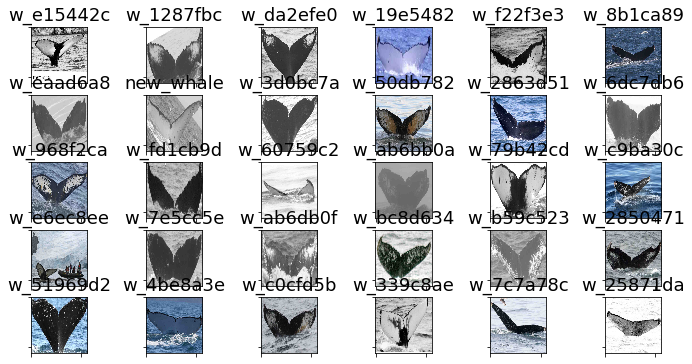

In [5]:
# load image from directory
def load_image(fn,set_resize=False):

    img = cv.imread(filename=os.path.join(data_dir, train_dir, fn))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    if set_resize is True:
        img = cv.resize(src=img, dsize=(224, 224), dst=img)

    img = np.array(img, dtype=np.float32) / 255

    return img

# display list of images in subplot
def show_images(train_dict, nrows=5, ncols=6):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,6))

    row = 0
    i = 0

    for id in train_dict.keys():

        if i >= nrows*ncols:
            break

        img = load_image(train_dict[id], set_resize=True)

        if i != 0 and i % ncols == 0:
            row += 1

        col = i % ncols

        axes[row,col].imshow(img)
        axes[row,col].set_title(id, fontsize=18)
        axes[row,col].xaxis.set_major_formatter(plt.NullFormatter())
        axes[row, col].yaxis.set_major_formatter(plt.NullFormatter())

        i+=1

    plt.show()

show_images(train_dict)

## Whale Id Distribution in Training Set


# of Unique Whale Ids: 4251
# of Whale Ids with N == 1 Image: 2220
# of Whale Ids with 2 <= N < 10 Images: 1965
# of Whale Ids with N >= 10 Images: 66


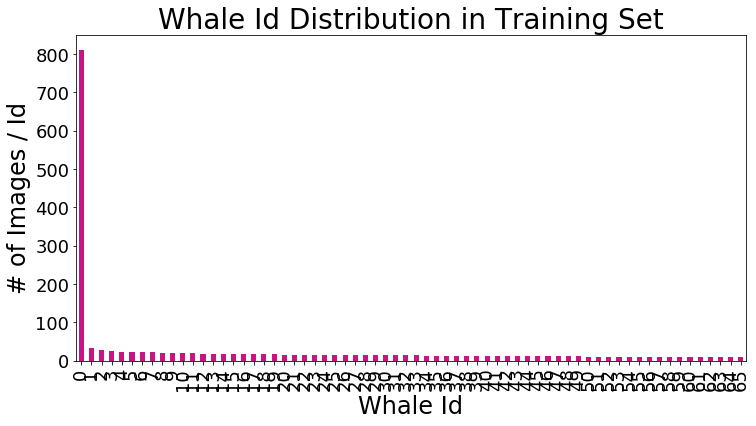

In [16]:
print("\n# of Unique Whale Ids: %d" %len(df['Id'].value_counts()) )

top1_counter = 0
top2_counter = 0
top10_counter = 0

id_list = df['Id'].unique()

for id in id_list:

    id_df = df[df['Id'] == id]
    img_fns = id_df['Image'].tolist()
    
    if len(img_fns) == 1:
        top1_counter+=1

    if len(img_fns) >= 2 and len(img_fns) < 10:
        top2_counter+=1

    if len(img_fns) >= 10:
        top10_counter+=1



print("# of Whale Ids with N == 1 Image: %d" %top1_counter)
print("# of Whale Ids with 2 <= N < 10 Images: %d" %top2_counter)
print("# of Whale Ids with N >= 10 Images: %d" %top10_counter)

# plot distribution of ids with >=10 images
df['Id'].value_counts().head(top10_counter).plot.bar(use_index=False, fontsize=18, figsize=(12,6), color='mediumvioletred')

plt.xlabel("Whale Id", fontsize=24)
plt.ylabel("# of Images / Id", fontsize=24)
plt.title("Whale Id Distribution in Training Set", fontsize=28)
plt.show()

## Image Size Distribution in Training Set

In [8]:
img_size_dict = {}

for fn in df['Image'].tolist():

    img = load_image(fn)

    height = img.shape[0]
    width = img.shape[1]

    size = (width,height)

    if size in img_size_dict.keys():
        img_size_dict[size] = img_size_dict[size] + 1
    else:
        img_size_dict[size] = 1

sorted_sizes = sorted([(v,k) for k, v in img_size_dict.items()], reverse=True)

print("\n# of Unique Image Sizes: %d" %len(img_size_dict))


# of Unique Image Sizes: 2587


### Plot Top 10 Most Frequent Sizes

In [9]:
d = OrderedDict(sorted_sizes[0:10], key=lambda t: t[1])
sizes_top10 = list(d.values())[:-1]
count_top10 = list(d.keys())[:-1]

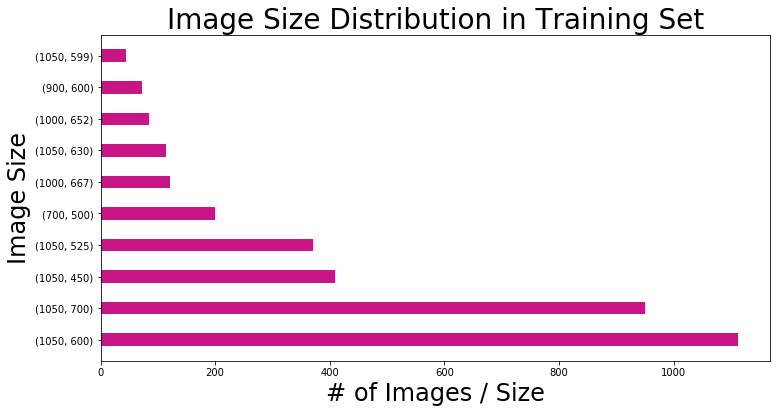

In [10]:
kwargs = {"color":"mediumvioletred"}
fig = plt.figure(figsize=(12,6))
plt.barh(np.arange(0, len(sizes_top10)), count_top10, height=0.4, align='center', **kwargs)
plt.xlabel("# of Images / Size", fontsize=24)
plt.ylabel("Image Size", fontsize=24)
plt.title("Image Size Distribution in Training Set", fontsize=28)
plt.yticks(np.arange(0,len(sizes_top10)), sizes_top10, fontsize=10, rotation=0)
plt.show()

## RGB / Grayscale Distribution in Training Set

In [14]:
i = 0
n_grayscale = 0

for fn in df['Image'].tolist():
    
    img = load_image(fn)
    r_channel = img[:,:,0]
    g_channel = img[:,:,1]
    b_channel = img[:,:,2]

    # pixel-wise variance
    rb_dist = np.power(np.abs(r_channel-b_channel), 2)
    rg_dist = np.power(np.abs(r_channel-g_channel), 2)
    bg_dist = np.power(np.abs(g_channel-b_channel), 2)

    total_dist = np.mean(np.sqrt(np.sum(rb_dist+rg_dist+bg_dist)))

    # print("Total Distance: %d" %total_dist)

    if total_dist == 0:
        n_grayscale+=1
    i+=1
    
print("# of grayscale: %d" %n_grayscale)
print("# of RGB: %d" %(n_train-n_grayscale))


# of grayscale: 4915
# of RGB: 4935
